# Taller 2

### Juan Carlos Cortes (jcortes@todosistemassti.co)
### Jose Cardozo Burgos (jcardozo@todosistemassti.co)

Se debe realizar las siguientes tareas:

* Crear una variable Binaria con respecto a la 
columna SalePrice, en donde 1 sea SalePrice mayor a 214000.000000
y 0 SalePrice Menor a 214000.000000.

* Una vez creada esta variable, se debe generar un modelo supervisado
que me pronostique el comportamiento de esta variable binaria. Utilizando las
demas columnas del data set.

ES IMPORTANTE QUE EN ESTE MODELO NO SE UTILICE
LAS VARIABLES ( Id, SalePrice)

* Los resultados a mostrar seran la importancia de las variables
y las metricas de la matriz de confusion.

* Se debe mostrar en un repositorio publico en github 
en un jupyter notebook.

EL Dataset para el ejercicio es el siguiente:
Se recomienda usar el dataset con las variables transformadas 
y data limpia ( pues esta fue la primera actividad).

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data?select=train.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from matplotlib import pyplot
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix

def clean_dataset(df):
  assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
  df.dropna(inplace=True)
  indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
  return df[indices_to_keep].astype(np.float64)

In [2]:
df = pd.read_csv("C:/datos/train.csv")

In [3]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


En este analisis se nota que hay 38 columnas con valoures numericos en contraposicion con las 81 columnas en total que tienes esta data. Esto dado que las metricas de promedio, min, max se hacen solo con valores numericos.

El count si se analiza indica cuales variables estan presentando nulos frente a las que estan llenas.

In [5]:
print('Cantidad de Filas y columnas:',df.shape)
print('Nombre columnas:',df.columns)

Cantidad de Filas y columnas: (1460, 81)
Nombre columnas: Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'G

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Aca se muestra mejor, y se confirma lo visto en el count del describe, que datos estan mejor poblados. La variable Alley, FireplaceQu, PoolQC,MiscFeature,  Fence tiene muchos nulos, mientras que LotFrontage , GarageQual, entre otros tienen unos pocos.     

In [7]:
correlation = df.corr(method="pearson")
correlation.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982


In [8]:
ndf = df.loc[:,["GarageCars", "OverallQual" , "SalePrice", "YearRemodAdd", "YearBuilt", "GrLivArea", "GarageArea", "TotalBsmtSF","BsmtFullBath","FullBath", "HalfBath",  "1stFlrSF", "2ndFlrSF",   "WoodDeckSF", "OpenPorchSF","Fireplaces","TotRmsAbvGrd"]]
cdf = clean_dataset(ndf)
corr = cdf.corr()
corr

,GarageCars,OverallQual,SalePrice,YearRemodAdd,YearBuilt,GrLivArea,GarageArea,TotalBsmtSF,BsmtFullBath,FullBath,HalfBath,1stFlrSF,2ndFlrSF,WoodDeckSF,OpenPorchSF,Fireplaces,TotRmsAbvGrd
GarageCars,1.000000,0.600671,0.640409,0.420622,0.537850,0.467247,0.882475,0.434585,0.131881,0.469672,0.219178,0.439317,0.183926,0.226342,0.213569,0.300789,0.362289
OverallQual,0.600671,1.000000,0.790982,0.550684,0.572323,0.593007,0.562022,0.537808,0.111098,0.550600,0.273458,0.476224,0.295493,0.238923,0.308819,0.396765,0.427452
SalePrice,0.640409,0.790982,1.000000,0.507101,0.522897,0.708624,0.623431,0.613581,0.227122,0.560664,0.284108,0.605852,0.319334,0.324413,0.315856,0.466929,0.533723
YearRemodAdd,0.420622,0.550684,0.507101,1.000000,0.592855,0.287389,0.371600,0.291066,0.119470,0.439046,0.183331,0.240379,0.140024,0.205726,0.226298,0.112581,0.191740
YearBuilt,0.537850,0.572323,0.522897,0.592855,1.000000,0.199010,0.478954,0.391452,0.187599,0.468271,0.242656,0.281986,0.010308,0.224880,0.188686,0.147716,0.095589
GrLivArea,0.467247,0.593007,0.708624,0.287389,0.199010,1.000000,0.468997,0.454868,0.034836,0.630012,0.415772,0.566024,0.687501,0.247433,0.330224,0.461679,0.825489
GarageArea,0.882475,0.562022,0.623431,0.371600,0.478954,0.468997,1.000000,0.486665,0.179189,0.405656,0.163549,0.489782,0.138347,0.224666,0.241435,0.269141,0.337822
TotalBsmtSF,0.434585,0.537808,0.613581,0.291066,0.391452,0.454868,0.486665,1.000000,0.307351,0.323722,-0.048804,0.819530,-0.174512,0.232019,0.247264,0.339519,0.285573
BsmtFullBath,0.131881,0.111098,0.227122,0.119470,0.187599,0.034836,0.179189,0.307351,1.000000,-0.064512,-0.030905,0.244671,-0.169494,0.175315,0.067341,0.137928,-0.053275
FullBath,0.469672,0.550600,0.560664,0.439046,0.468271,0.630012,0.405656,0.323722,-0.064512,1.000000,0.136381,0.380637,0.421378,0.187703,0.259977,0.243671,0.554784


GrLivArea, TotalBsmtSF, OverallQual, GarageCars, GarageArea presentan buena correlacion.

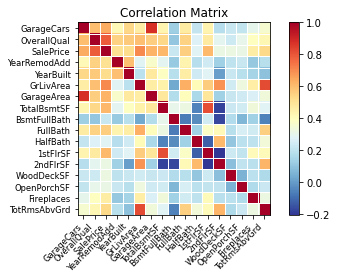

In [9]:
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

Metodologia de limpieza de datos: Se utilizan los datos que mejor puedan estudiarse para saber el precio segun las caracteristicas de la construccion, y las que mayor cantidad de informacion proveen (menos nulos, en este caso, ninguno) como primer acercamiento. 


In [10]:
cdf.describe()

,GarageCars,OverallQual,SalePrice,YearRemodAdd,YearBuilt,GrLivArea,GarageArea,TotalBsmtSF,BsmtFullBath,FullBath,HalfBath,1stFlrSF,2ndFlrSF,WoodDeckSF,OpenPorchSF,Fireplaces,TotRmsAbvGrd
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,1.767123,6.099315,180921.195890,1984.865753,1971.267808,1515.463699,472.980137,1057.429452,0.425342,1.565068,0.382877,1162.626712,346.992466,94.244521,46.660274,0.613014,6.517808
std,0.747315,1.382997,79442.502883,20.645407,30.202904,525.480383,213.804841,438.705324,0.518911,0.550916,0.502885,386.587738,436.528436,125.338794,66.256028,0.644666,1.625393
min,0.000000,1.000000,34900.000000,1950.000000,1872.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,1.000000,5.000000,129975.000000,1967.000000,1954.000000,1129.500000,334.500000,795.750000,0.000000,1.000000,0.000000,882.000000,0.000000,0.000000,0.000000,0.000000,5.000000
50%,2.000000,6.000000,163000.000000,1994.000000,1973.000000,1464.000000,480.000000,991.500000,0.000000,2.000000,0.000000,1087.000000,0.000000,0.000000,25.000000,1.000000,6.000000
75%,2.000000,7.000000,214000.000000,2004.000000,2000.000000,1776.750000,576.000000,1298.250000,1.000000,2.000000,1.000000,1391.250000,728.000000,168.000000,68.000000,1.000000,7.000000
max,4.000000,10.000000,755000.000000,2010.000000,2010.000000,5642.000000,1418.000000,6110.000000,3.000000,3.000000,2.000000,4692.000000,2065.000000,857.000000,547.000000,3.000000,14.000000


In [11]:
cdf.columns

Index(['GarageCars', 'OverallQual', 'SalePrice', 'YearRemodAdd', 'YearBuilt',
       'GrLivArea', 'GarageArea', 'TotalBsmtSF', 'BsmtFullBath', 'FullBath',
       'HalfBath', '1stFlrSF', '2ndFlrSF', 'WoodDeckSF', 'OpenPorchSF',
       'Fireplaces', 'TotRmsAbvGrd'],
      dtype='object')

Se hace una analisis exploratorio para ver el comportamiento de las variables contra el precio de la vivienda

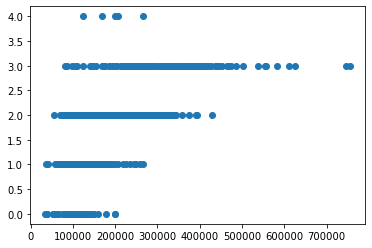

In [12]:
pyplot.scatter(cdf["SalePrice"],cdf["GarageCars"])

con varias combinaciones relacionadas al precio, se reflejan grupos.

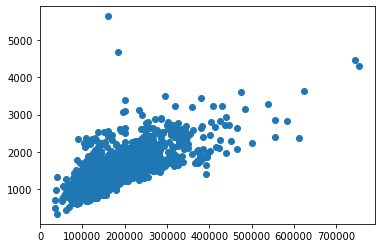

In [13]:
pyplot.scatter(cdf["SalePrice"],cdf["GrLivArea"])

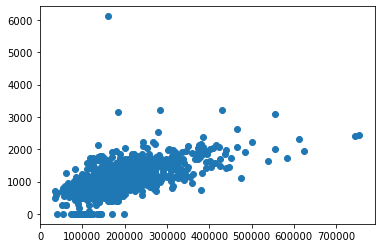

In [14]:
pyplot.scatter(cdf["SalePrice"],cdf["TotalBsmtSF"])

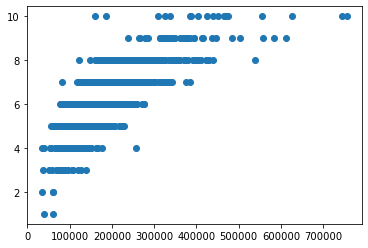

In [15]:
pyplot.scatter(cdf["SalePrice"],cdf["OverallQual"])

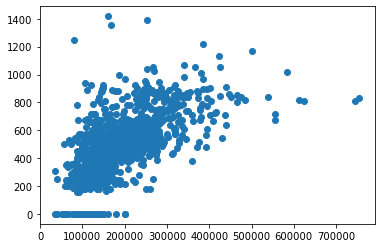

In [16]:
pyplot.scatter(cdf["SalePrice"],cdf["GarageArea"])

GarageCars, OverallQual, GarageArea muestran unos agrupamientos en la data contra la variable SalesPrice

# Modelos supervisados (Objetivo del Taller 2)

In [17]:
cdf["NEW_VAR"] = np.where(cdf['SalePrice']>214000.000000 , 1, 0)

In [18]:
cdf

,GarageCars,OverallQual,SalePrice,YearRemodAdd,YearBuilt,GrLivArea,GarageArea,TotalBsmtSF,BsmtFullBath,FullBath,HalfBath,1stFlrSF,2ndFlrSF,WoodDeckSF,OpenPorchSF,Fireplaces,TotRmsAbvGrd,NEW_VAR
0,2.0,7.0,208500.0,2003.0,2003.0,1710.0,548.0,856.0,1.0,2.0,1.0,856.0,854.0,0.0,61.0,0.0,8.0,0
1,2.0,6.0,181500.0,1976.0,1976.0,1262.0,460.0,1262.0,0.0,2.0,0.0,1262.0,0.0,298.0,0.0,1.0,6.0,0
2,2.0,7.0,223500.0,2002.0,2001.0,1786.0,608.0,920.0,1.0,2.0,1.0,920.0,866.0,0.0,42.0,1.0,6.0,1
3,3.0,7.0,140000.0,1970.0,1915.0,1717.0,642.0,756.0,1.0,1.0,0.0,961.0,756.0,0.0,35.0,1.0,7.0,0
4,3.0,8.0,250000.0,2000.0,2000.0,2198.0,836.0,1145.0,1.0,2.0,1.0,1145.0,1053.0,192.0,84.0,1.0,9.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,2.0,6.0,175000.0,2000.0,1999.0,1647.0,460.0,953.0,0.0,2.0,1.0,953.0,694.0,0.0,40.0,1.0,7.0,0
1456,2.0,6.0,210000.0,1988.0,1978.0,2073.0,500.0,1542.0,1.0,2.0,0.0,2073.0,0.0,349.0,0.0,2.0,7.0,0
1457,1.0,7.0,266500.0,2006.0,1941.0,2340.0,252.0,1152.0,0.0,2.0,0.0,1188.0,1152.0,0.0,60.0,2.0,9.0,1
1458,1.0,5.0,142125.0,1996.0,1950.0,1078.0,240.0,1078.0,1.0,1.0,0.0,1078.0,0.0,366.0,0.0,0.0,5.0,0


Vamos a usar Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier
y_train = cdf['NEW_VAR'].astype("int")
x_train = cdf.loc[:,['GarageCars', 'OverallQual', 'YearRemodAdd', 'YearBuilt',
       'GrLivArea', 'GarageArea', 'TotalBsmtSF', 'BsmtFullBath', 'FullBath',
       'HalfBath', '1stFlrSF', '2ndFlrSF', 'WoodDeckSF', 'OpenPorchSF',
       'Fireplaces', 'TotRmsAbvGrd']]


In [34]:
Random_F = RandomForestClassifier(n_estimators = 100,max_depth=0.5, random_state=0)
Random_Fit = Random_F.fit(x_train, y_train)

In [35]:
confusion_matrix(y_train, Random_Fit.predict(x_train))

array([[1098,    0],
       [ 362,    0]], dtype=int64)

No parece ser un buen metodo, especificidad y sensitividad resultan fuera de los rangos. Se probará con arbol de decision

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
import seaborn as sb
import matplotlib.pyplot as plt
from IPython.display import Image as PImage

decision_tree = tree.DecisionTreeClassifier(criterion='entropy',
                                            min_samples_split=20,
                                            min_samples_leaf=5,
                                            max_depth = 4,
                                            class_weight={1:3.5})
tree = decision_tree.fit(x_train, y_train)

In [37]:
confusion_matrix(y_train, tree.predict(x_train))

array([[1012,   86],
       [  36,  326]], dtype=int64)

Accuracy 

In [40]:
(1012+326)/(1012+326+36+86)

0.9164383561643835

Especificidad

In [1]:
1012/(1012+86)

0.9216757741347905

Sensitividad

In [42]:
326/(326+36)

0.9005524861878453

Valor predictivo positivo

In [43]:
326/(326+86)

0.7912621359223301

Valor predictivo negativo

In [44]:
1012/(1012+36)

0.9656488549618321

In [45]:
prob = tree.predict_proba(x_train)

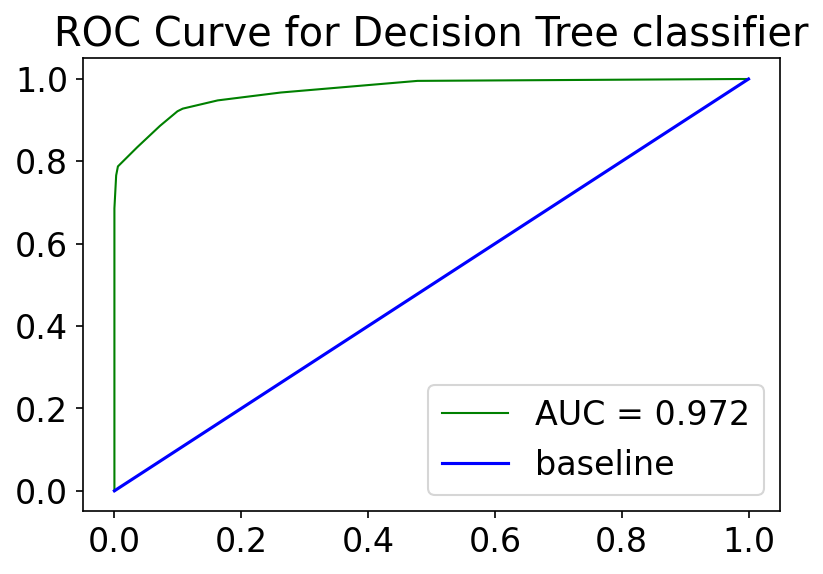

In [46]:
from sklearn.metrics import roc_curve, auc
# get false and true positive rates
fpr, tpr, thresholds = roc_curve(y_train, prob[:,0], pos_label=0)
base_fpr, base_tpr, _ = roc_curve(y_train, [1 for _ in range(len(y_train))])
# get area under the curve
roc_auc = auc(fpr, tpr)
# PLOT ROC curve
plt.figure(dpi=150)
plt.plot(fpr, tpr, lw=1, color='green', label=f'AUC = {roc_auc:.3f}')
plt.title('ROC Curve for Decision Tree classifier')
plt.rcParams['font.size'] = 16
    # Plot both curves
plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
plt.legend();

El modelo es muy bueno porque, como muestra la curva ROC, estas variables seleccionadas pueden predecir con mucha precision el precio del inmueble, dado que se aleja de la linea base (del 50-50).